In [1]:
# noinspection PyUnresolvedReferences
# noinspection PyUnresolvedReferences
# from ipynb.fs.full.preparation import expanded_df, expanded_df2

In [2]:
# noinspection PyUnresolvedReferences
# noinspection PyUnresolvedReferences
# from ipynb.fs.full.preparation import expanded_df, expanded_df2

Datasets: 8. Strategies: 3. Single dataset Formulae:5111


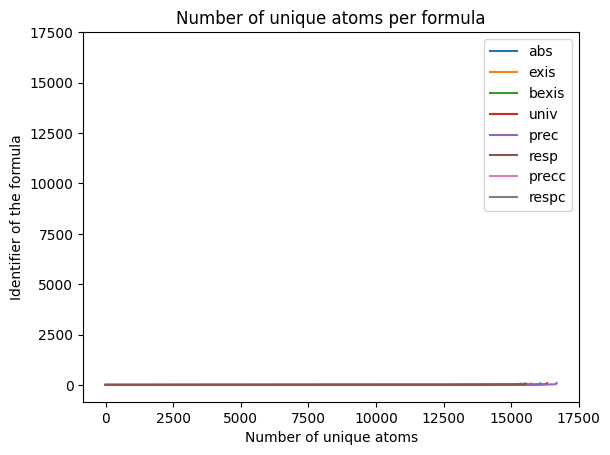

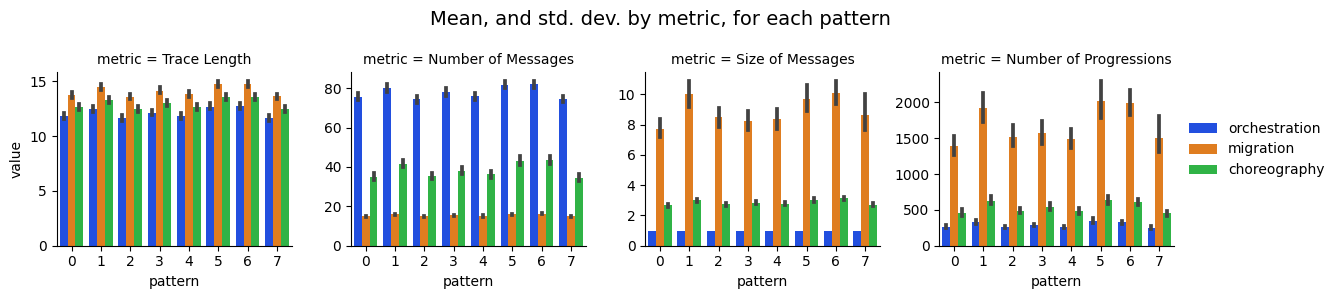

In [3]:
# noinspection PyUnresolvedReferences
from ipynb.fs.full.full_data_7 import full_scale_df_7 as full_scale_df

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression

from decmon.learning import *

## Classification

We drop columns that are not numeric (and in our case, present in the dataset in other forms)

In [5]:
cols_to_drop = ['formula', 'trace', 'strategy']

In [6]:
TARGET = 'strategy_id'
N_CLASSES = 3 # orchestration, migration, choreography

In [7]:
final_df = clean_df(full_scale_df, cols_to_drop)

In [8]:
X_train, X_test, y_train, y_test = prepare_learning_sets(final_df, TARGET)

### K-Neighbours Classifier

In [9]:
# K Neighbors Classifier
kn_classifier = KNeighborsClassifier(n_neighbors=N_CLASSES)
kn_classifier.fit(X_train, y_train)

kn_classifier.score(X_test, y_test)

#y_pred = kn_classifier.predict(X_test)
#y_pred

0.966721998261007

In [10]:
final_full_df = clean_df(full_scale_df, cols_to_drop)


In [11]:

f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, TARGET)

kn_classifier = KNeighborsClassifier(n_neighbors=N_CLASSES)
classifier = kn_classifier.fit(f_X_train, f_y_train)

mean_accuracy = classifier.score(f_X_test, f_y_test)
mean_accuracy

0.966721998261007

In [12]:
pred_y = classifier.predict(f_X_test)
f1_score(pred_y, f_y_test, average=None)

array([0.94988466, 0.9689105 , 0.98127252])

## Regression

In [13]:
final_full_df

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,0,1,2,3,...,641,642,643,644,645,646,647,648,649,650
0,5111,1,2,7,1.00,8,2,-1,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5111,1,2,7,1.00,8,2,-1,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5111,1,3,14,1.00,6,1,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5111,1,2,7,1.00,3,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5111,1,2,7,1.00,3,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15535,5180,6,22,42,2.93,256,1,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15536,5180,6,38,74,3.18,373,1,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15537,5180,6,36,278,12.39,2873,1,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15538,5180,6,18,17,1.41,104,1,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Linear Regression - Progressions

In [14]:
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'nb_progressions')

In [15]:


regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)


0.06178566855959455

0.06178566855959455

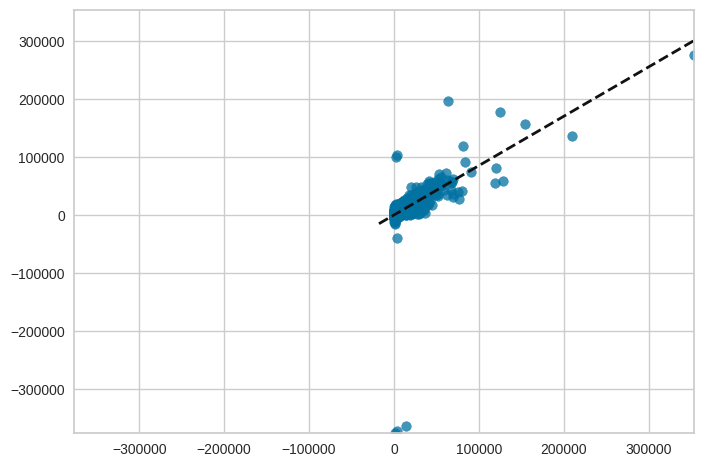

In [16]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data


# sns.regplot(x="total_bill", y="tip", data=tips);

In [17]:
visualizer.show()                 # Finalize and render the figure

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

### SVM

In [18]:
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)

### Neural networks (MLPRegressor)

In [19]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=1000)
t_regr = regr.fit(f_X_train, f_y_train)

/home/ennio/.cache/pypoetry/virtualenvs/distributed-monitor-qCzmrR0W-py3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
regr.score(f_X_test, f_y_test)

0.47747300633055834

In [21]:
import pickle

with open("finalized_mlp_regressor",'wb') as f:
    pickle.dump(t_regr, f)

In [22]:
final_full_df


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,0,1,2,3,...,641,642,643,644,645,646,647,648,649,650
0,5111,1,2,7,1.00,8,2,-1,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5111,1,2,7,1.00,8,2,-1,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5111,1,3,14,1.00,6,1,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5111,1,2,7,1.00,3,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5111,1,2,7,1.00,3,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15535,5180,6,22,42,2.93,256,1,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15536,5180,6,38,74,3.18,373,1,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15537,5180,6,36,278,12.39,2873,1,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15538,5180,6,18,17,1.41,104,1,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0.47747300633055834

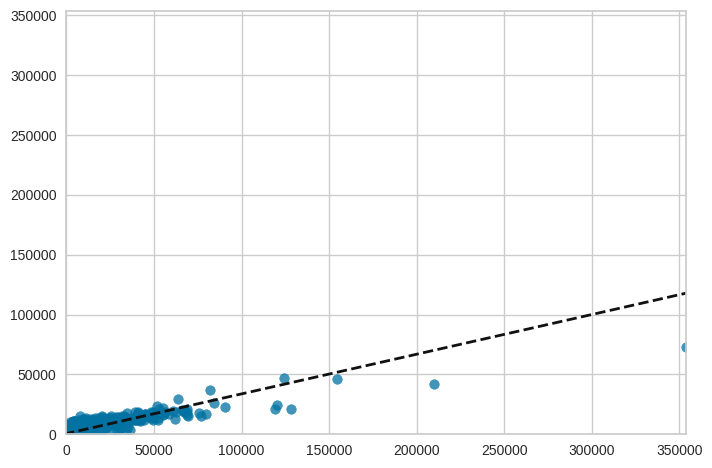

In [23]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data


In [24]:
visualizer.show()                 # Finalize and render the figure

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [25]:
### Linear Regression - N. messages
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'num_mess')

regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)

0.11297855810390867

0.11297855810390867

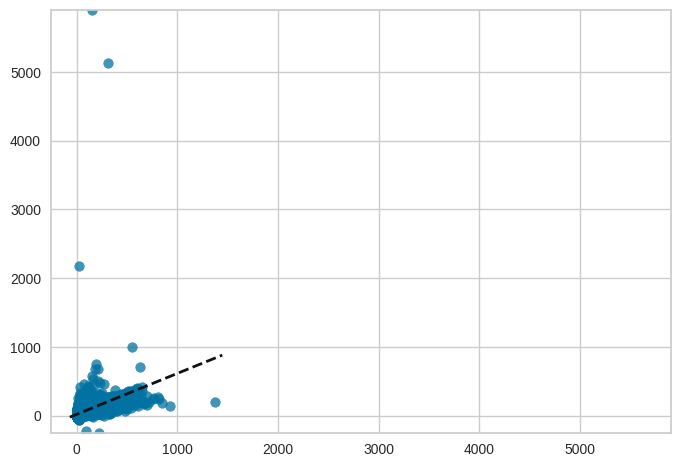

In [26]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data


In [27]:
visualizer.show()  # Finalize and render the figure

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [28]:

# sns.regplot(x="total_bill", y="tip", data=tips);
### SVM
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)
### Neural networks (MLPRegressor)
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)
regr.score(f_X_test, f_y_test)

/home/ennio/.cache/pypoetry/virtualenvs/distributed-monitor-qCzmrR0W-py3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7625099889742784

0.7625099889742784

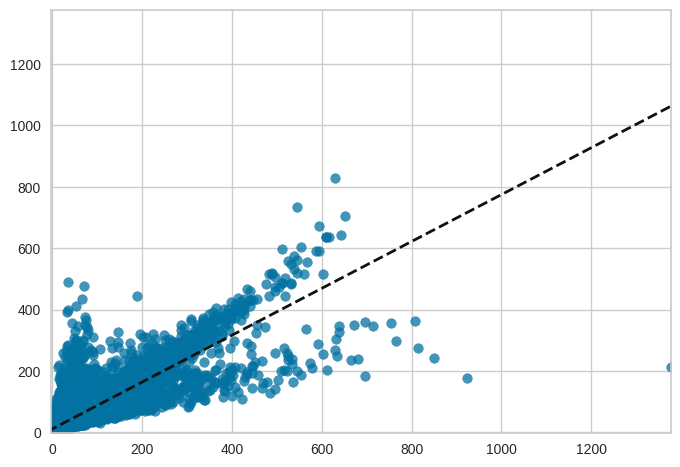

In [29]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data


In [30]:
visualizer.show()  # Finalize and render the figure

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [31]:
### Linear Regression - Size of the messages
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'size_mess')

regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)

0.13022402732290983

0.13022402732290983

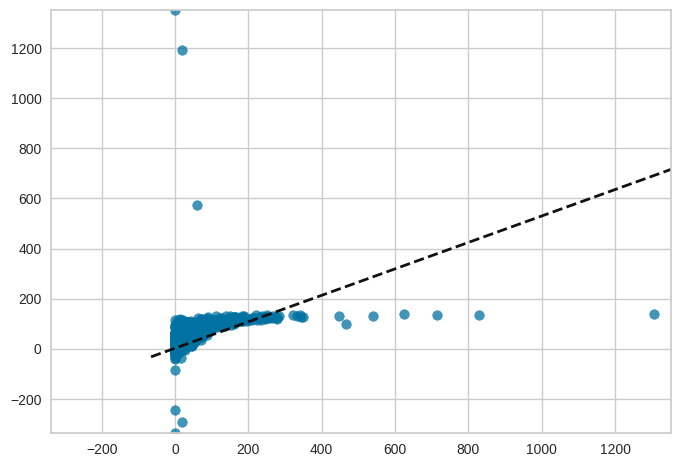

In [32]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data

# sns.regplot(x="total_bill", y="tip", data=tips);
### SVM
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)
### Neural networks (MLPRegressor)

In [33]:
visualizer.show()  # Finalize and render the figure


<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [34]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)
regr.score(f_X_test, f_y_test)

/home/ennio/.cache/pypoetry/virtualenvs/distributed-monitor-qCzmrR0W-py3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9101415650639512

0.9101415650639512

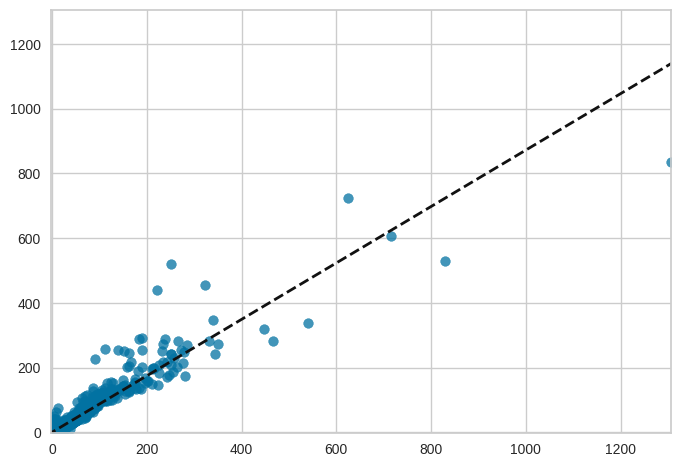

In [35]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data


In [36]:
visualizer.show()  # Finalize and render the figure

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [37]:
### Linear Regression - Trace length
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'trace_len')


In [38]:

regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)

-1.4521939313531207

-1.4521939313531207

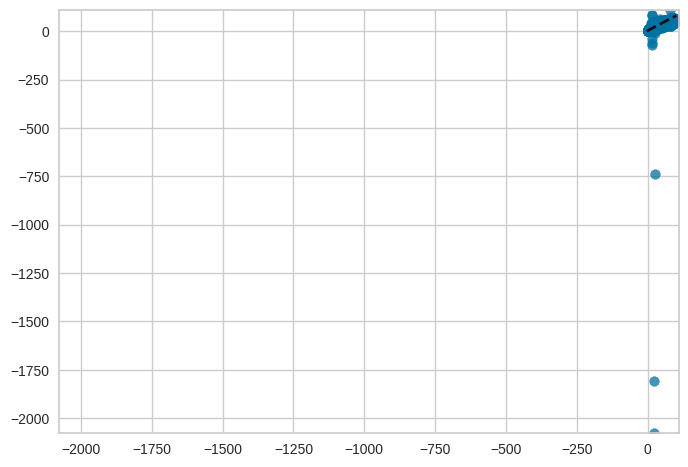

In [39]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data


In [40]:
visualizer.show()  # Finalize and render the figure

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [41]:

# sns.regplot(x="total_bill", y="tip", data=tips);
### SVM
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)
### Neural networks (MLPRegressor)
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)

MLPRegressor(max_iter=1000, random_state=1)

In [42]:

regr.score(f_X_test, f_y_test)

0.9008998319031634

0.9008998319031634

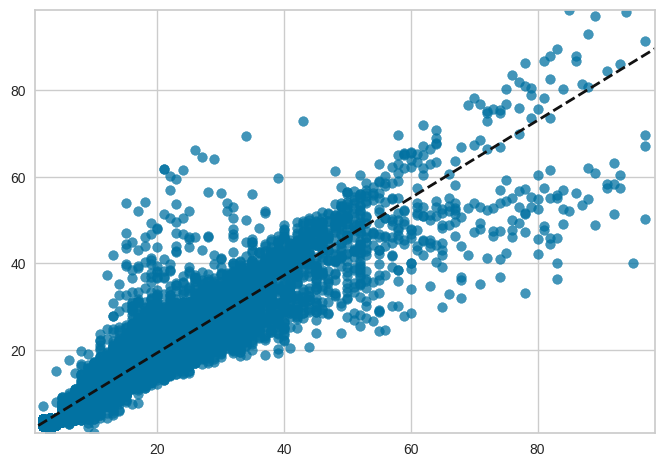

In [43]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data


In [44]:
visualizer.show()  # Finalize and render the figure


<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>